<a href="https://colab.research.google.com/github/wjddn1892/colaboratory/blob/main/multiclass_classification_myself.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

## 구글 드라이브와 연동 (코랩 새로 결 때마다 지워지기 때문에)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 구글 GPU 사용

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


## train_DS와 test_DS 구경

In [ ]:
torch.cuda.is_available()

True

In [ ]:
transform = transforms.ToTensor()
train_DS = datasets.MNIST(root='/content/drive/MyDrive/Colab Notebooks/data', train=True, download=True, transform=transform)
test_DS = datasets.MNIST(root='/content/drive/MyDrive/Colab Notebooks/data', train=False, download=True, transform=transform)
# %ls

In [ ]:
print(train_DS)
print(test_DS)
print(len(train_DS))
# N = len(train_DS)
print(len(test_DS))

Dataset MNIST
    Number of datapoints: 60000
    Root location: /content/drive/MyDrive/Colab Notebooks/data
    Split: Train
    StandardTransform
Transform: ToTensor()
Dataset MNIST
    Number of datapoints: 10000
    Root location: /content/drive/MyDrive/Colab Notebooks/data
    Split: Test
    StandardTransform
Transform: ToTensor()
60000
10000


In [ ]:
train_DS.classes  # . 뒤에서 탭 누르면 이것 저것 볼 수 있는 게 뜬다

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

In [ ]:
train_DS.class_to_idx

{'0 - zero': 0,
 '1 - one': 1,
 '2 - two': 2,
 '3 - three': 3,
 '4 - four': 4,
 '5 - five': 5,
 '6 - six': 6,
 '7 - seven': 7,
 '8 - eight': 8,
 '9 - nine': 9}

In [ ]:
train_DS.data.shape

torch.Size([60000, 28, 28])

In [ ]:
train_DS.data[0]

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,
          18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

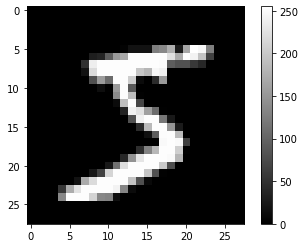

In [ ]:
plt.imshow(train_DS.data[0], cmap='gray')
plt.colorbar()

In [ ]:
print(train_DS.targets)
print(train_DS.targets.shape)

tensor([5, 0, 4,  ..., 5, 6, 8])
torch.Size([60000])


## DataLoader 구경

In [ ]:
BATCH_SIZE = 32
train_DL = torch.utils.data.DataLoader(train_DS, batch_size=BATCH_SIZE, shuffle=True)
test_DL = torch.utils.data.DataLoader(test_DS, batch_size=BATCH_SIZE, shuffle=True)

In [ ]:
print(len(train_DL.dataset))

60000


torch.Size([32, 1, 28, 28])
torch.Size([32])


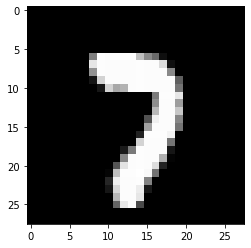

In [ ]:
images, label = next(iter(train_DL))
print(images.shape)
print(label.shape)
plt.imshow(images[0].squeeze(), cmap='gray')  # squeeze를 통해 (1, 28, 28)을 (28, 28)로 변환

In [ ]:
a = iter([1, 2, 3])
print(next(a))
print(next(a))

1
2


## 본격적으로 model 만들기

In [ ]:
from torch import nn, optim
import torch.nn.functional as F

class MLP(nn.Module):
  def __init__(self):
    super().__init__()
    self.fcs = nn.Sequential(nn.Linear(784, 30),
                             nn.BatchNorm1d(30),
                             nn.ReLU(),  #  nn.Sigmoid(),
                             nn.Linear(30, 10))
  
  def forward(self, x):
    x = torch.flatten(x, start_dim=1)
    x = self.fcs(x)
    return x

In [ ]:
# flatten 확인
images, label = next(iter(train_DL))
print(images.shape)
flat_images = torch.flatten(images)
print(flat_images.shape)
flat_images2 = torch.flatten(images, start_dim=1)
print(flat_images2.shape)

torch.Size([32, 1, 28, 28])
torch.Size([25088])
torch.Size([32, 784])


In [ ]:
model = MLP()
print(model(images).shape)

torch.Size([32, 10])


## training 함수

In [ ]:
LR = 1e-3
epoch = 5


def Train(model, train_DL):
  # optimizer = optim.SGD(model.parameters(), lr=LR)
  optimizer = optim.Adam(model.parameters(), lr=LR)

  loss_hist = []
  NoT = len(train_DL.dataset) # The Number of training data

  model.train() # train mode로 전환

  for ep in range(epoch):
    rloss = 0  # running loss
    for x_batch, y_batch in train_DL:
      x_batch = x_batch.to(device)
      y_batch = y_batch.to(device)  # gpu로 보내준다.
      # inference
      y_hat = model(x_batch)

      # loss 
      loss = F.cross_entropy(y_hat, y_batch)
      # loss = F.mse_loss(y_hat, y_batch)

      # update
      optimizer.zero_grad() # 초기화
      loss.backward()
      optimizer.step()

      # loss accumulation
      loss_b = loss.item() * x_batch.shape[0]  # batch loss # BATCH_SIZE를 곱하면 18개도 32를 곱하니까..
      rloss += loss_b

    # print loss
    loss_e = rloss / NoT  # epoch loss
    loss_hist += [loss_e]
    print(f"Epoch : {ep+1}, train loss : {round(loss_e, 3)}")
    print('-'*20)

  return loss_hist

## cross entropy 확인

In [ ]:
# cross entropy 여러가지 방법
input = torch.randn(3, 5)
print(input)
target = torch.randint(5, (3,))  # 0~4까지의 값
print(target)

# 방법 1
loss = F.cross_entropy(input, target)
print(loss)

# 방법 2
input_soft = F.softmax(input, dim=1)
print(input_soft)
loss2 = 0
for i, val in enumerate(input_soft):
  print(i, val)
  loss2 += -torch.log(val[target[i]])
loss2 = loss2 / input.shape[0]
print(loss2)

# 방법 3
criterion = nn.CrossEntropyLoss()
print(criterion(input, target))

tensor([[-0.2077, -0.0333, -0.4445,  0.2570,  1.0828],
        [-0.2850, -1.0152, -1.1075,  0.6928,  2.4446],
        [ 2.0447, -0.3514, -1.0723,  0.0272, -0.5031]])
tensor([3, 2, 1])
tensor(2.7158)
tensor([[0.1219, 0.1451, 0.0962, 0.1940, 0.4429],
        [0.0502, 0.0242, 0.0221, 0.1335, 0.7699],
        [0.7426, 0.0676, 0.0329, 0.0988, 0.0581]])
0 tensor([0.1219, 0.1451, 0.0962, 0.1940, 0.4429])
1 tensor([0.0502, 0.0242, 0.0221, 0.1335, 0.7699])
2 tensor([0.7426, 0.0676, 0.0329, 0.0988, 0.0581])
tensor(2.7158)
tensor(2.7158)


## 훈련하기

Epoch : 1, train loss : 0.41
--------------------
Epoch : 2, train loss : 0.214
--------------------
Epoch : 3, train loss : 0.176
--------------------
Epoch : 4, train loss : 0.153
--------------------
Epoch : 5, train loss : 0.139
--------------------


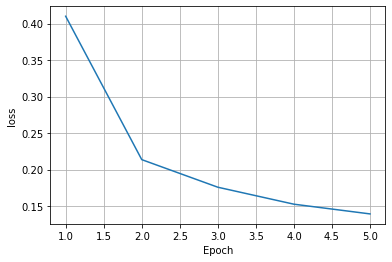

In [ ]:
model = MLP().to(device)
loss_hist = Train(model, train_DL)

plt.plot(range(1, epoch+1), loss_hist)
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.grid()  # 격자 생김

Text(0.5, 1.0, 'Train loss')

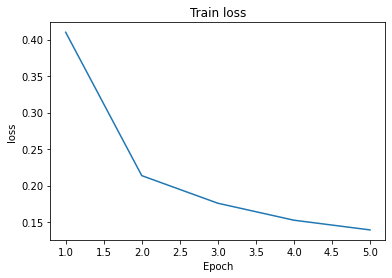

In [ ]:
plt.plot(range(1, epoch+1), loss_hist)
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.title('Train loss')

## 모델 저장하기 & 불러오기

In [ ]:
save_model_path = '/content/drive/MyDrive/Colab Notebooks/data/results'
torch.save(model.state_dict(), save_model_path)

In [ ]:
load_model = MLP().to(device)
load_model.load_state_dict(torch.load(save_model_path)) # map_location 있어야 GPU로 학습했던 거 현재 device

<All keys matched successfully>

In [ ]:
def Test(model, test_DL):
  NoTes = len(test_DL.dataset)
  model.eval()
  with torch.no_grad():
    rcorrect = 0
    for x_batch, y_batch in test_DL:
      x_batch = x_batch.to(device)
      y_batch = y_batch.to(device)

      # inference
      y_hat = model(x_batch)
      # print(y_hat.shape)

      # accuracy
      pred = y_hat.argmax(dim=1)  # torch.argmax(y_hat, dim=1)과 같음
      # print(pred)
      # print(y_batch)
      corrects_b = torch.sum(pred == y_batch).item()
      rcorrect += corrects_b  # rcorrect는 running correct
    
    test_acc = rcorrect / NoTes * 100

  print(f'Test accuracy: {rcorrect}/{NoTes} ({round(test_acc, 2)} %)')

In [ ]:
Test(load_model, test_DL)

Test accuracy: 9650/10000 (96.5 %)


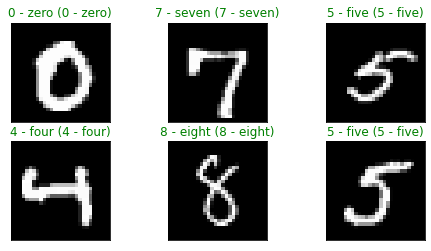

In [ ]:
load_model.eval()
with torch.no_grad():
    x_batch, y_batch = next(iter(test_DL))
    x_batch = x_batch.to(device)
    y_hat = model(x_batch)
    pred= y_hat.argmax(dim=1)

x_batch = x_batch.to('cpu')
pred = pred.to('cpu')

plt.figure(figsize=(8, 4))
for idx in range(6):
  plt.subplot(2, 3, idx+1, xticks=[], yticks=[])
  plt.imshow(x_batch[idx, 0, ...], cmap='gray')
  pred_class = test_DL.dataset.classes[pred[idx].item()]
  true_class = test_DL.dataset.classes[y_batch[idx].item()]
  plt.title(f'{pred_class} ({true_class})', color='g' if pred_class==true_class else 'r')

In [ ]:
num = 0
for param in load_model.parameters():
    if param.requires_grad:
        num += param.numel()
print(num)

23920
